## Map Graph 

- https://automating-gis-processes.github.io/2017/lessons/L7/retrieve-osm-data.html
- https://github.com/gboeing/osmnx  
*follow conda installation, otherwise many erros may arises.

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx

from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.10'

In [2]:
place_name = "Steglitz, Berlin, Germany"
graph = ox.graph_from_place(place_name, network_type='walk')

## Graph of Grunewald, Berlin

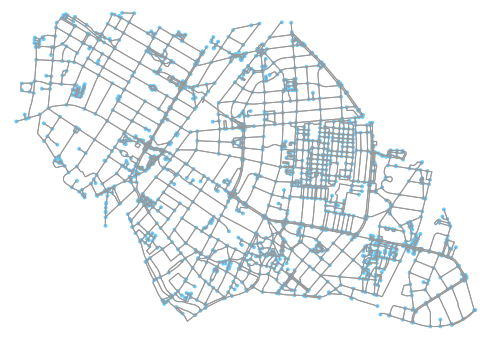

<Figure size 432x288 with 0 Axes>

In [3]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout();

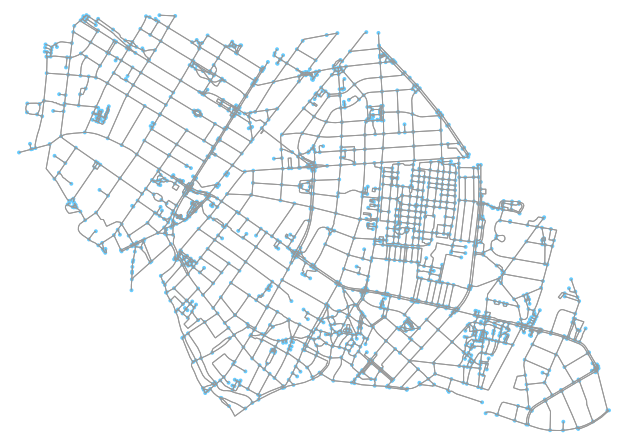

In [4]:
# project the network to an appropriate UTM (automatically determined)
graph_projected = ox.project_graph(graph)

# you can also plot/save figures as SVGs to work with in Illustrator later
fig, ax = ox.plot_graph(graph_projected, save=True, file_format='svg')

In [5]:
# plot the street network with folium
graph_map = ox.plot_graph_folium(graph, popup_attribute='name', edge_width=2)

In [6]:
# save as html file then display map as an iframe
filepath = 'data/graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

## Graph of Whole Berlin

In [4]:
# place_query = {'city':'Berlin', 'state':'Berlin', 'country':'Germany'}
berlinG = ox.graph_from_place("Berlin, Germany", which_result=2, network_type='drive')

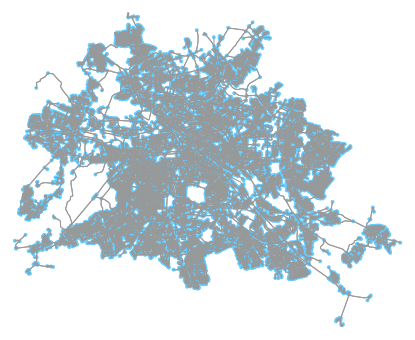

In [5]:
berlinG_proj = ox.project_graph(berlinG)
fig, ax = ox.plot_graph(berlinG_proj)

## Node and Edges of Graph of Grunewald Graph

In [7]:
nodes, edges = ox.graph_to_gdfs(graph)

In [9]:
nodes.head(5)

,y,x,osmid,highway,geometry
4012421120,52.448629,13.354047,4012421120,NaN,POINT (13.35405 52.44863)
26906629,52.454506,13.318408,26906629,crossing,POINT (13.31841 52.45451)
26906630,52.454813,13.318792,26906630,NaN,POINT (13.31879 52.45481)
26906634,52.455050,13.318955,26906634,NaN,POINT (13.31895 52.45505)
26906639,52.454924,13.319224,26906639,NaN,POINT (13.31922 52.45492)


In [23]:
nodes.shape

(1901, 5)

In [10]:
edges.head(5)

,u,v,key,osmid,highway,oneway,length,geometry,tunnel,lanes,name,maxspeed,ref,service,bridge,width,access
0,4012421120,2632040034,0,391870607,footway,False,3.840,"LINESTRING (13.35405 52.44863, 13.35410 52.44861)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4012421120,2632040037,0,391870607,footway,False,4.455,"LINESTRING (13.35405 52.44863, 13.35399 52.44865)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4012421120,602439709,0,"[121483988, 398490147, 257731636]","[steps, footway]",False,27.828,"LINESTRING (13.35405 52.44863, 13.35407 52.448...","[building_passage, yes]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26906629,1192469943,0,"[29139347, 148708807]","[primary, secondary_link]",False,55.466,"LINESTRING (13.31841 52.45451, 13.31838 52.454...",NaN,3,Schloßstraße,50,B 1,NaN,NaN,NaN,NaN
4,26906629,26906630,0,148708807,secondary_link,False,42.892,"LINESTRING (13.31841 52.45451, 13.31846 52.454...",NaN,3,Schloßstraße,50,NaN,NaN,NaN,NaN,NaN


## Shortest Path

### Simple Shortest Path (based on osmid)

In [8]:
list(graph.nodes())[0]

4012421120

In [7]:
# use networkx to calculate the shortest path between two nodes
origin_node = list(graph.nodes())[0]
destination_node = list(graph.nodes())[20]
route = nx.shortest_path(graph, origin_node, destination_node)

In [12]:
route

[4012421120,
 602439709,
 2625852005,
 4012421137,
 609000822,
 5434812041,
 27433490,
 27433488,
 1654481248,
 628053324,
 3264096791,
 1618815935,
 31350669,
 31350071,
 1618815958,
 1618815963,
 443546728,
 27433702,
 241881515,
 241881517,
 241881519,
 241881521,
 241881560,
 4422819618,
 237937128,
 2972708990,
 2972708993,
 27434773,
 27434763,
 26627351,
 27434717,
 27434720,
 27434719,
 27434722,
 28196808,
 28196771,
 968062924,
 968062921,
 1406942856,
 659609057,
 291703849,
 313895010,
 291703780,
 26849003,
 26849000,
 4164106820,
 1420372623,
 6235317739,
 26583825,
 26583824,
 26627402,
 26848718,
 6758998055,
 6758998056]

In [13]:
# plot the route with folium
route_map = ox.plot_route_folium(graph, route)

# save as html file then display map as an iframe
filepath = 'data/route.html'
route_map.save(filepath)
IFrame(filepath, width=600, height=500)

### Simple Shortest Path (based on lat & lon to get nearest_node)

In [14]:
origin = ox.get_nearest_node(graph, tuple(nodes[['x','y']].iloc[0].tolist()))
destination = ox.get_nearest_node(graph, tuple(nodes[['x','y']].iloc[20].tolist()))
route = nx.shortest_path(graph, origin_node, destination_node)

In [15]:
route

[4012421120,
 602439709,
 2625852005,
 4012421137,
 609000822,
 5434812041,
 27433490,
 27433488,
 1654481248,
 628053324,
 3264096791,
 1618815935,
 31350669,
 31350071,
 1618815958,
 1618815963,
 443546728,
 27433702,
 241881515,
 241881517,
 241881519,
 241881521,
 241881560,
 4422819618,
 237937128,
 2972708990,
 2972708993,
 27434773,
 27434763,
 26627351,
 27434717,
 27434720,
 27434719,
 27434722,
 28196808,
 28196771,
 968062924,
 968062921,
 1406942856,
 659609057,
 291703849,
 313895010,
 291703780,
 26849003,
 26849000,
 4164106820,
 1420372623,
 6235317739,
 26583825,
 26583824,
 26627402,
 26848718,
 6758998055,
 6758998056]

### Dijkstra Path 

In [16]:
dijkstra_route = nx.dijkstra_path(graph, origin_node, destination_node)

# plot the route with folium
dijkstra_route_map = ox.plot_route_folium(graph, dijkstra_route)

# save as html file then display map as an iframe
filepath = 'data/dijkstra_route.html'
dijkstra_route_map.save(filepath)
IFrame(filepath, width=600, height=500)

### Shortest Path by Distance

In [17]:
route_length = nx.shortest_path(graph, origin_node, destination_node, weight='length')

# plot the route with folium
route_map_length = ox.plot_route_folium(graph, route_length)

# save as html file then display map as an iframe
filepath = 'data/route_length.html'
route_map_length.save(filepath)
IFrame(filepath, width=600, height=500)

### Validation on Google Maps

![title](images/route_googleMap.jpg)

## Shortest Path - Distance & Pollution

### Inspired by an example on shortest distance considering edge grade impedance

https://github.com/gboeing/osmnx-examples/blob/master/notebooks/12-node-elevations-edge-grades.ipynb

In [ ]:
# define some edge impedance function here
def impedance(length, grade):
    penalty = grade ** 2
    return length * penalty

# add impedance and elevation rise values to each edge in the projected graph
# use absolute value of grade in impedance function if you want to avoid uphill and downhill
for u, v, k, data in G_proj.edges(keys=True, data=True):
    data['impedance'] = impedance(data['length'], data['grade_abs'])
    data['rise'] = data['length'] * data['grade']
    
# For example once we have pollution for each edge, we can assign it to the edge like this (Majid):    
route_by_impedance = nx.shortest_path(G_proj, source=origin, target=destination, weight='impedance')

### Voronoi diagram (perhaps for estimating nearest edge pollution from real data)
- https://ipython-books.github.io/145-computing-the-voronoi-diagram-of-a-set-of-points/

In [12]:
import pandas as pd 

In [15]:
pollution = pd.read_csv("../data/RolandFinal.csv", index_col=0)

In [16]:
pollution

,Longitude,Latitude,Altitude,TimeStamp_,Speed,Time,Date,Ref,Sen,ATN,Flow,PCB temp,Status,Battery,BC
0,13.330289,52.513310,29.0,2019-08-23 10:24:00+00:00,2.524672,10:24:00,2019/08/21,924146,859856,7.211,149,22,0,100,2012
1,13.324207,52.512963,24.0,2019-08-23 10:25:00+00:00,7.281495,10:25:00,2019/08/21,924130,859321,7.271,149,22,0,100,2307
2,13.321078,52.513353,31.0,2019-08-23 10:26:00+00:00,0.098834,10:26:00,2019/08/21,924182,859269,7.283,149,23,0,100,445
3,13.317219,52.512327,42.0,2019-08-23 10:27:00+00:00,4.811670,10:27:00,2019/08/21,924036,858832,7.318,149,23,0,100,1337
4,13.316973,52.512350,63.0,2019-08-23 10:28:00+00:00,0.334229,10:28:00,2019/08/21,924193,858777,7.341,149,23,0,100,892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,NaN,NaN,NaN,NaN,NaN,13:05:00,2019/08/21,922669,800432,14.212,149,29,0,100,269
162,NaN,NaN,NaN,NaN,NaN,13:06:00,2019/08/21,922686,800355,14.223,149,29,0,100,437
163,NaN,NaN,NaN,NaN,NaN,13:07:00,2019/08/21,922702,800310,14.231,149,29,0,100,280
164,NaN,NaN,NaN,NaN,NaN,13:08:00,2019/08/21,922796,800363,14.234,149,29,0,100,136
